In [1]:
!pip install geopandas pyshp

    100% |████████████████████████████████| 890kB 766kB/s ta 0:00:01
    100% |████████████████████████████████| 194kB 985kB/s ta 0:00:01
    100% |████████████████████████████████| 4.4MB 269kB/s ta 0:00:01
    100% |████████████████████████████████| 13.5MB 96kB/s eta 0:00:011
    100% |████████████████████████████████| 12.5MB 113kB/s ta 0:00:011
    100% |████████████████████████████████| 952kB 729kB/s ta 0:00:011
    100% |████████████████████████████████| 61kB 1.9MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 1.5MB/s ta 0:00:011
  Running setup.py bdist_wheel for pyshp ... done
  Stored in directory: /root/.cache/pip/wheels/c1/bf/48/4209516889f62a89118947e7e48e5033d72d300cf1f73a11ca
  Running setup.py bdist_wheel for pyproj ... done
  Stored in directory: /root/.cache/pip/wheels/85/dd/2f/d1ed07a507c7adb330cda0afcc96cae8e9abb4d85bbb788bdf
  Running setup.py bdist_wheel for click-plugins ... done
  Stored in directory: /root/.cache/pip/wheels/70/d7/3d/188128669f2aa42

In [2]:
import shapefile

# Input
shapefile as input

In [3]:
sf = shapefile.Reader("shape/map.shp")

In [4]:
sf.shapes()

[<shapefile._Shape instance at 0x7f4e3ddde9e0>,
 <shapefile._Shape instance at 0x7f4e3ddde998>,
 <shapefile._Shape instance at 0x7f4e3dda70e0>,
 <shapefile._Shape instance at 0x7f4e3dd2def0>]

In [8]:
len(list(sf.iterShapes()))

4

What are the type of shapes

In [23]:
shape

<shapefile._Shape instance at 0x7f4e28134098>

In [10]:
for name in dir(shapes[3]):
    if not name.startswith('__'):
        print name

TypeError: 'instancemethod' object has no attribute '__getitem__'

In [15]:
sf.shapes()[3].shapeType


5

In [17]:
# Get the bounding box of the 4th shape.
# Round coordinates to 3 decimal places
bbox = sf.shapes()[3].bbox
['%.3f' % coord for coord in bbox]


['30.891', '-27.325', '31.978', '-26.754']

In [19]:
points = sf.shapes()[3].points
['%.3f, %.3f' % (x,y) for x,y in points]

['31.119, -26.854',
 '31.174, -26.822',
 '31.177, -26.822',
 '31.182, -26.823',
 '31.188, -26.828',
 '31.191, -26.831',
 '31.193, -26.828',
 '31.195, -26.826',
 '31.198, -26.822',
 '31.201, -26.820',
 '31.207, -26.817',
 '31.206, -26.813',
 '31.210, -26.810',
 '31.215, -26.808',
 '31.222, -26.809',
 '31.229, -26.813',
 '31.234, -26.817',
 '31.242, -26.821',
 '31.248, -26.827',
 '31.259, -26.836',
 '31.270, -26.846',
 '31.288, -26.858',
 '31.294, -26.855',
 '31.297, -26.854',
 '31.301, -26.850',
 '31.292, -26.833',
 '31.294, -26.828',
 '31.300, -26.827',
 '31.304, -26.830',
 '31.310, -26.831',
 '31.317, -26.833',
 '31.322, -26.831',
 '31.321, -26.829',
 '31.319, -26.824',
 '31.313, -26.819',
 '31.313, -26.815',
 '31.310, -26.812',
 '31.306, -26.809',
 '31.305, -26.805',
 '31.309, -26.802',
 '31.314, -26.804',
 '31.320, -26.806',
 '31.326, -26.804',
 '31.331, -26.802',
 '31.336, -26.798',
 '31.339, -26.796',
 '31.343, -26.797',
 '31.350, -26.797',
 '31.354, -26.798',
 '31.385, -26.799',


In [17]:
sf.shapes()[3].parts

[0]

In [18]:
len(shapes[3].points)

NameError: name 'shapes' is not defined

In [ ]:
fields = sf.fields

In [ ]:
fields

In [22]:
shapeRecs = sf.shapeRecords()

In [23]:
sf.shape(0).__geo_interface__["type"]

'Polygon'

# example
read a shape file and extract the points 
After the points are extracted display it in polygon using shapely and construct a multipolygon

Self-intersection at or near point 30.890500000008615 -26.786389999993844


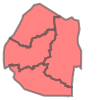

In [19]:
from shapely.geometry import Polygon, Point, MultiPolygon
import shapefile

polygon = shapefile.Reader('shape/map.shp') 
polygon = polygon.shapes() 


shpfilePoints = []
for shape in polygon:
    shpfilePoints.append(Polygon(shape.points))
MultiPolygon(shpfilePoints)

# example..
Join all points to form a single polygon

Self-intersection at or near point 31.367233144749402 -26.392758375200103


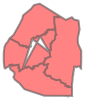

In [20]:
from shapely.geometry import Polygon, Point, MultiPolygon
import shapefile

polygon = shapefile.Reader('shape/map.shp') 
polygon = polygon.shapes() 


shpfilePoints = []
for shape in polygon:
    shpfilePoints.extend(shape.points)
Polygon(shpfilePoints)

In [21]:
shpfilePoints

[(31.283909999998286, -26.32772999998997),
 (31.282240000000456, -26.329200000007404),
 (31.278779999993276, -26.334230000007665),
 (31.27591999998549, -26.343839999986812),
 (31.27741999999853, -26.347080000006827),
 (31.27952000001096, -26.350990000006277),
 (31.28442000001087, -26.361160000000382),
 (31.282559999992372, -26.364360000006855),
 (31.280100000003586, -26.366949999995995),
 (31.263280000013765, -26.387430000002496),
 (31.263550000003306, -26.389950000011595),
 (31.265060000005178, -26.395309999992605),
 (31.26657000000705, -26.40252000000328),
 (31.26618000000599, -26.406320000009146),
 (31.261079999996582, -26.409829999989597),
 (31.261349999986123, -26.416150000004563),
 (31.260009999998147, -26.419919999985723),
 (31.25628999999026, -26.424609999987297),
 (31.25716999999713, -26.426420000003418),
 (31.25787999999011, -26.432499999995343),
 (31.258150000008754, -26.436859999987064),
 (31.257860000012442, -26.441580000013346),
 (31.258419999998296, -26.44724999999744),


# example of point inside polygon

In [22]:
x = 31.283909
y = -26.3277299

point = Point(x, y)
# point in polygon test
if Polygon(shpfilePoints).contains(point):
    print 'inside'
else:
    print 'OUT'

inside


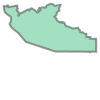

In [13]:
# Another variation
Polygon([i for i in (polys.shapeRecords()[3].shape.__geo_interface__['coordinates'])[0]])

# Combining subpolygons
Using geopandas patch all polygons to one single large polygon


In [4]:
import geopandas

In [5]:
poly  = geopandas.GeoDataFrame.from_file('shape/map.shp')

In [56]:
poly.geometry

0    POLYGON ((31.28390999999829 -26.32772999998997...
1    POLYGON ((31.58947000000626 -26.56620000000112...
2    POLYGON ((31.42412999999942 -26.28727000000072...
3    POLYGON ((31.11866000000737 -26.85362000000896...
Name: geometry, dtype: object

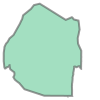

In [61]:
a = [i for i in poly.geometry]
from shapely.ops import cascaded_union
# the cascade operation combines all polygons to a single polygon
b = cascaded_union(a)
b

In [60]:
b.area

1.5743900808844868

In [78]:
# Gridding a polygon
import shapefile as shp
import math

minx,maxx,miny,maxy = -86.04766845703125, -85.99822998046875, 40.14610941584639, 40.171298683163265
dx = 10
dy = 10

#nx = int(math.ceil(abs(maxx - minx)/dx))
#ny = int(math.ceil(abs(maxy - miny)/dy))



nx = maxx - minx
ny = maxy - miny
print nx
print ny

w = shp.Writer(shp.POLYGON)
w.autoBalance = 1
w.field("ID")
id=0

for i in range(ny):
    for j in range(nx):
        id+=1
        vertices = []
        parts = []
        vertices.append([min(minx+dx*j,maxx),max(maxy-dy*i,miny)])
        vertices.append([min(minx+dx*(j+1),maxx),max(maxy-dy*i,miny)])
        vertices.append([min(minx+dx*(j+1),maxx),max(maxy-dy*(i+1),miny)])
        vertices.append([min(minx+dx*j,maxx),max(maxy-dy*(i+1),miny)])
        parts.append(vertices)
        print vertices
        w.poly(parts)
        w.record(id)

w.save('polygon_grid')

0.0494384765625
0.0251892673169


TypeError: range() integer end argument expected, got float.